In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [2]:
df = pd.read_csv('final_todas_las_actas_1_903108.csv', encoding = "ISO-8859-1")

C:\Users\abadc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_distrito = df.groupby('distrito').total_votos_emitidos.sum()

In [6]:
df_distrito_con_votos = df_distrito[df_distrito != 0] #Distritos con al menos 1 voto

In [9]:
# Crear un diccionario con los primeros dígitos
diccionario_digitos = dict()

In [10]:
for i in df_distrito_con_votos:
    if str(i)[0] in diccionario_digitos.keys():
        diccionario_digitos[str(i)[0]] += 1
    else:
        diccionario_digitos[str(i)[0]] = 0

In [11]:
print(diccionario_digitos)

{'3': 258, '1': 561, '2': 354, '5': 157, '6': 117, '8': 84, '4': 190, '9': 90, '7': 89}


In [12]:
benford = pd.DataFrame(diccionario_digitos.items(), columns= ['digito', 'total'], index = diccionario_digitos.keys())

In [13]:
benford = benford.sort_values(by='digito')

In [14]:
benford

,digito,total
1,1,561
2,2,354
3,3,258
4,4,190
5,5,157
6,6,117
7,7,89
8,8,84
9,9,90


In [43]:
benford_real = pd.DataFrame([round(math.log10(1+1/i)*100,2) for i in range(1,10)], index=['1','2','3','4','5','6','7','8','9'], columns=['Valor real de Benford'])

In [44]:
benford_real

,Valor real de Benford
1,30.10
2,17.61
3,12.49
4,9.69
5,7.92
6,6.69
7,5.80
8,5.12
9,4.58


In [45]:
benford['porcentaje_total'] = round(benford['total']*100/sum(benford['total']), 2)

In [46]:
#benford['real'] = [round(math.log10(1+1/i)*100,2) for i in range(1,10)]

In [47]:
print(benford)

  digito  total  porcentaje_total
1      1    561             29.53
2      2    354             18.63
3      3    258             13.58
4      4    190             10.00
5      5    157              8.26
6      6    117              6.16
7      7     89              4.68
8      8     84              4.42
9      9     90              4.74


[(0.0, 35.0)]

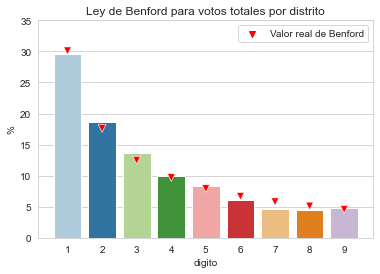

In [50]:
sns.set_style('whitegrid')
sns.barplot(data=benford, x= 'digito', y='porcentaje_total', palette='Paired')
g =sns.scatterplot(data=benford_real, color='b', s=60, zorder=10, markers='v', palette=['red'])

g.set(title='Ley de Benford para votos totales por distrito')
g.set(ylabel = '%')
g.set(ylim=(0, 35))
